In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
print(tf.keras.__version__)
    
    
    

2.8.0


In [3]:
#loading mnist dataset
mnist =keras.datasets.mnist
(X_train,Y_train) ,(X_test,Y_test) = mnist.load_data()

In [ ]:
#Data Exploration

In [4]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
#Data Processing

In [5]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [6]:
# X_train is 60000 rows of 28x28 values; we reshape it to # 60000 x 784. 
RESHAPED = 784 # 28x28 = 784 neurons
X_train = X_train.reshape(60000, RESHAPED) 
X_test = X_test.reshape(10000, RESHAPED) 

# Data is converted into float32 to use 32-bit precision # when training a neural network 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32') 

# Normalizing the input to be within the range [0,1]
X_train /= 255
#intensity of each pixel is divided by 255, the maximum intensity value
X_test /= 255
print(X_train.shape[0], 'train samples') 
print(X_test.shape[0], 'test samples') 

# One-hot representation of the labels.
Y_train = tf.keras.utils.to_categorical(Y_train, 10) 
Y_test = tf.keras.utils.to_categorical(Y_test, 10)


60000 train samples
10000 test samples


In [ ]:
# Designing the model

In [7]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
model_0 = Sequential()
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 10)
model_0.add(Dense(10,input_shape=(784,),name='dense_layer', activation='softmax')) 

In [8]:
# Compiling the model.
model_0.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
training = model_0.fit(X_train, Y_train, batch_size=64, epochs=70, validation_split=0.2) 

Epoch 1/70
750/750 [==============================] - 3s 2ms/step - loss: 1.0979 - accuracy: 0.7381 - val_loss: 0.6574 - val_accuracy: 0.8561
Epoch 2/70
750/750 [==============================] - 2s 2ms/step - loss: 0.6098 - accuracy: 0.8521 - val_loss: 0.5087 - val_accuracy: 0.8753
Epoch 3/70
750/750 [==============================] - 2s 2ms/step - loss: 0.5131 - accuracy: 0.8687 - val_loss: 0.4491 - val_accuracy: 0.8873
Epoch 4/70
750/750 [==============================] - 2s 2ms/step - loss: 0.4662 - accuracy: 0.8777 - val_loss: 0.4169 - val_accuracy: 0.8929
Epoch 5/70
750/750 [==============================] - 2s 2ms/step - loss: 0.4375 - accuracy: 0.8834 - val_loss: 0.3955 - val_accuracy: 0.8983
Epoch 6/70
750/750 [==============================] - 2s 2ms/step - loss: 0.4175 - accuracy: 0.8879 - val_loss: 0.3808 - val_accuracy: 0.8999
Epoch 7/70
750/750 [==============================] - 2s 2ms/step - loss: 0.4027 - accuracy: 0.8913 - val_loss: 0.3693 - val_accuracy: 0.9021
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


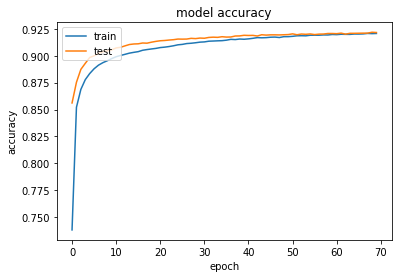

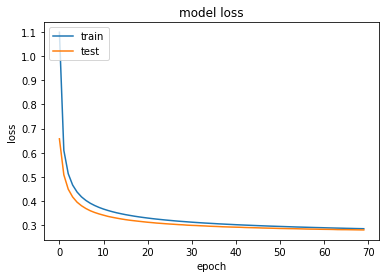

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [15]:
#evaluate the model

In [16]:
test_loss, test_acc = model_0.evaluate(X_test, Y_test)
print('Test accuracy:',test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.2820 - accuracy: 0.9227
Test accuracy: 0.9226999878883362


In [17]:
model_0.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x0000017A790CEFD0>>

In [18]:
model_0.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_layer_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'units': 10,
    'activation': 'softmax',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}}]}

In [19]:
## Improved Model
# Adding Hidden Layer -Multi Layer Perceptron

In [22]:
model_1 = tf.keras.Sequential()
N_hidden = 64
#add a dense layer with 64 units to the model
model_1.add(Dense(N_hidden, name ='dense_layer', input_shape =(784,), activation='relu'))

#Adding another dense layer:
model_1.add(Dense(N_hidden, name='dense_layer_2', activation ='relu'))

#Add an output later with 10 output units(10 dofferent classes) :

model_1.add(Dense(10, name ='dense_layer_3', activation ='softmax'))


In [27]:
# Compiling the model.
model_1.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
#training the model

In [28]:
# Training the model. 
training = model_1.fit(X_train, Y_train, batch_size=64, epochs=100, validation_split=0.2) 

Epoch 1/100
750/750 [==============================] - 2s 3ms/step - loss: 1.0606 - accuracy: 0.7223 - val_loss: 0.4708 - val_accuracy: 0.8811
Epoch 2/100
750/750 [==============================] - 2s 3ms/step - loss: 0.4184 - accuracy: 0.8871 - val_loss: 0.3391 - val_accuracy: 0.9052
Epoch 3/100
750/750 [==============================] - 2s 3ms/step - loss: 0.3400 - accuracy: 0.9032 - val_loss: 0.2976 - val_accuracy: 0.9163
Epoch 4/100
750/750 [==============================] - 2s 3ms/step - loss: 0.3052 - accuracy: 0.9129 - val_loss: 0.2737 - val_accuracy: 0.9227
Epoch 5/100
750/750 [==============================] - 2s 3ms/step - loss: 0.2819 - accuracy: 0.9194 - val_loss: 0.2569 - val_accuracy: 0.9257
Epoch 6/100
750/750 [==============================] - 2s 3ms/step - loss: 0.2640 - accuracy: 0.9243 - val_loss: 0.2453 - val_accuracy: 0.9293
Epoch 7/100
750/750 [==============================] - 3s 4ms/step - loss: 0.2490 - accuracy: 0.9283 - val_loss: 0.2333 - val_accuracy: 0.9318

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


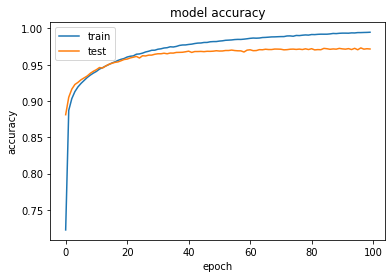

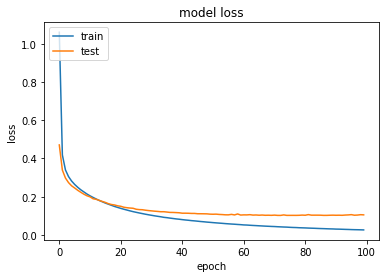

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [30]:
#evaluate the model

In [31]:
test_loss, test_acc = model_1.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0977 - accuracy: 0.9733
Test accuracy: 0.9732999801635742


In [32]:
model_1.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x0000017A40297730>>

In [33]:
model_1.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 64) dtype=float32, numpy=
 array([[ 0.04184151,  0.07484329, -0.05836526, ..., -0.00992094,
         -0.02230011,  0.07457718],
        [ 0.04799647, -0.06751891, -0.08197079, ..., -0.04820681,
          0.03909601,  0.04817937],
        [ 0.07163293,  0.07864302,  0.0816107 , ..., -0.07144151,
         -0.01553377,  0.02368086],
        ...,
        [ 0.06536224,  0.0219769 ,  0.04750953, ..., -0.07723888,
          0.06111658,  0.01419678],
        [-0.06032088, -0.0555639 ,  0.03132113, ...,  0.00513593,
          0.03820261, -0.04609313],
        [ 0.07361031,  0.02890076,  0.07796208, ..., -0.02962716,
         -0.03916369, -0.0534182 ]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(64,) dtype=float32, numpy=
 array([ 0.14401609,  0.10199883, -0.09747075,  0.20732813, -0.03885527,
         0.18668602,  0.20643197, -0.04894602, -0.09494681, -0.00394628,
         0.03531727,  0.01587129,  0.1506128 ,  0.00778147, -0.1023

In [34]:
model_1.get_config()

{'name': 'sequential_2',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_layer_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'units': 64,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_layer_2',
    'trainable': True,
    'dtype': 'float32',
    'units': 64,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': No

In [35]:
from tensorflow.keras.layers import Dropout
#Most Common type of model is a stack layers
model_2 = tf.keras.Sequential()
N_hidden =128
#Adds a densely-connected layer with 64 units to the model:
model_2.add(Dense(N_hidden, name ='dense_layer', input_shape=(784,), activation ='relu'))
#now the model will take as input arrays of shape(*, 784)# and output arrays of shape(*,64)
model_2.add(Dropout(0.3))
#Adding another dense layer
model_2.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_2.add(Dropout(0.3))

#Add an output layer with 10 output units(10 different classes):
model_2.add(Dense(10, name='dense_layer_3', activation = 'softmax'))



In [36]:
#compiling the model

In [40]:
# Compiling the model.
model_2.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [41]:
#training the model
training = model_2.fit(X_train, Y_train, batch_size=64, epochs=50, validation_split=0.2)

Epoch 1/50
750/750 [==============================] - 3s 3ms/step - loss: 1.3064 - accuracy: 0.5890 - val_loss: 0.5215 - val_accuracy: 0.8752
Epoch 2/50
750/750 [==============================] - 2s 3ms/step - loss: 0.6388 - accuracy: 0.8076 - val_loss: 0.3694 - val_accuracy: 0.9009
Epoch 3/50
750/750 [==============================] - 2s 3ms/step - loss: 0.5138 - accuracy: 0.8459 - val_loss: 0.3117 - val_accuracy: 0.9132
Epoch 4/50
750/750 [==============================] - 2s 3ms/step - loss: 0.4412 - accuracy: 0.8688 - val_loss: 0.2788 - val_accuracy: 0.9188
Epoch 5/50
750/750 [==============================] - 2s 3ms/step - loss: 0.4043 - accuracy: 0.8805 - val_loss: 0.2561 - val_accuracy: 0.9258
Epoch 6/50
750/750 [==============================] - 2s 3ms/step - loss: 0.3712 - accuracy: 0.8921 - val_loss: 0.2382 - val_accuracy: 0.9307
Epoch 7/50
750/750 [==============================] - 2s 3ms/step - loss: 0.3440 - accuracy: 0.8995 - val_loss: 0.2228 - val_accuracy: 0.9337
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


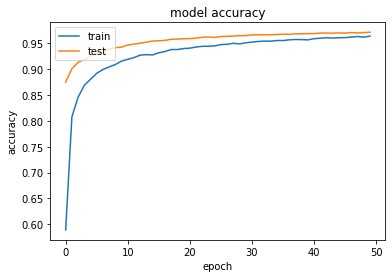

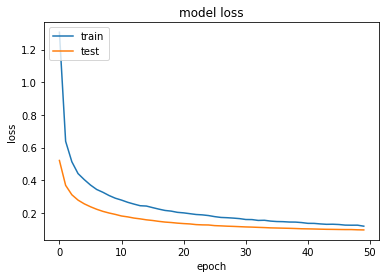

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [43]:
#evaluate the model
test_loss, test_acc = model_2.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0917 - accuracy: 0.9724
Test accuracy: 0.9724000096321106


In [44]:
model_2.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x0000017BEF808E20>>

In [45]:
model_2.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 128) dtype=float32, numpy=
 array([[ 0.02128963, -0.02136989, -0.07003576, ..., -0.07428899,
          0.02062132, -0.03298426],
        [-0.0541799 ,  0.05098019,  0.03679324, ...,  0.07972597,
          0.04591569, -0.00579565],
        [ 0.00980113,  0.02620214, -0.07739308, ..., -0.01669501,
          0.03980447,  0.02002949],
        ...,
        [ 0.07594075, -0.03020403,  0.04965664, ...,  0.03458657,
          0.03252354, -0.01264089],
        [ 0.00644226, -0.07850118,  0.04842446, ...,  0.0549385 ,
         -0.01512332, -0.05156242],
        [ 0.06141875, -0.0036193 ,  0.04054365, ...,  0.00304569,
         -0.01244371, -0.04414568]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(128,) dtype=float32, numpy=
 array([-0.18714732,  0.02699812,  0.03342853, -0.02587539, -0.11511552,
        -0.02974825,  0.00995916, -0.00897248,  0.0573863 , -0.04297567,
        -0.02534203,  0.1029657 ,  0.03154017, -0.01392886, -0.08

In [46]:
model_2.get_config()

{'name': 'sequential_3',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_layer_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'units': 128,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout',
    'trainable': True,
    'dtype': 'float32',
    'rate': 0.3,
    'noise_shape': None,
    'seed': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_layer_2',
    'trainable': True,
  

In [47]:
#improved Model 3_ changing the optimizer - Adam

In [50]:
#Most common type of model is a stack of layers
model_3 = tf.keras.Sequential()
N_hidden = 64
# Adds a densely-connected layer with 64 units to the model:
model_3.add(Dense(N_hidden, name='dense_layer', input_shape=(784,), activation = 'relu'))
# Now the model will take as input arrays of shape (*, 784)# and output arrays of shape (*, 64)
model_3.add(Dropout(0.3))
# Adding another dense layer:
model_3.add(Dense(N_hidden, name='dense_layer_2', activation='relu'))
model_3.add(Dropout(0.3))
# After the first layer, you don't need to specify# the size of the input anymore:
# Add an output layer with 10 output units (10 different classes):
model_3.add(Dense(10, name='dense_layer_3', activation = 'softmax'))

In [51]:
#compiling the model
model_3.compile(optimizer = 'Adam',
               loss = 'categorical_crossentropy',
               metrics =['accuracy'])

In [52]:
#Training the model
training = model_3.fit(X_train,Y_train,batch_size=128, epochs=20, validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.7065 - accuracy: 0.7796 - val_loss: 0.2382 - val_accuracy: 0.9296
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3422 - accuracy: 0.8987 - val_loss: 0.1878 - val_accuracy: 0.9450
Epoch 3/20
375/375 [==============================] - 1s 4ms/step - loss: 0.2806 - accuracy: 0.9176 - val_loss: 0.1574 - val_accuracy: 0.9546
Epoch 4/20
375/375 [==============================] - 2s 4ms/step - loss: 0.2460 - accuracy: 0.9276 - val_loss: 0.1444 - val_accuracy: 0.9586
Epoch 5/20
375/375 [==============================] - 1s 4ms/step - loss: 0.2190 - accuracy: 0.9357 - val_loss: 0.1331 - val_accuracy: 0.9615
Epoch 6/20
375/375 [==============================] - 1s 4ms/step - loss: 0.2012 - accuracy: 0.9396 - val_loss: 0.1269 - val_accuracy: 0.9643
Epoch 7/20
375/375 [==============================] - 2s 5ms/step - loss: 0.1873 - accuracy: 0.9436 - val_loss: 0.1268 - val_accuracy: 0.9647
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


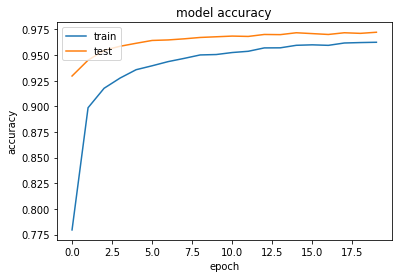

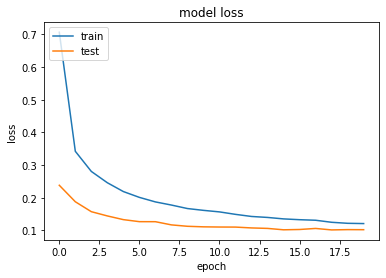

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [54]:
#evaluate the model
test_loss,test_acc = model_3.evaluate(X_test,Y_test)
print('Test accuracy',test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1018 - accuracy: 0.9705
Test accuracy 0.9704999923706055


In [55]:
model_3.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x0000017BEFDBD2B0>>

In [56]:
model_3.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 64) dtype=float32, numpy=
 array([[-0.00580148, -0.04301707, -0.00457961, ...,  0.04709374,
         -0.00958249, -0.07678879],
        [ 0.0312084 , -0.04646603,  0.00399984, ...,  0.00376043,
          0.06712876,  0.05316427],
        [ 0.06970911,  0.01323166, -0.0198216 , ..., -0.0411074 ,
          0.00242003, -0.03529059],
        ...,
        [ 0.04915727, -0.03558836, -0.02805027, ...,  0.00590475,
          0.0016026 ,  0.04257461],
        [-0.02399398, -0.03906508, -0.04289813, ...,  0.04839019,
          0.00795003, -0.00348341],
        [ 0.0807833 ,  0.04698276,  0.05462139, ..., -0.05967417,
         -0.03072087,  0.0481601 ]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(64,) dtype=float32, numpy=
 array([ 0.00418012, -0.26176572,  0.23154743,  0.05023533,  0.02939513,
         0.04993853,  0.00600429, -0.140481  ,  0.05769116, -0.25914615,
        -0.03900951,  0.00411779,  0.10693796, -0.12009765,  0.0092

In [57]:
model_3.get_config()

{'name': 'sequential_5',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_layer_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'units': 64,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout_4',
    'trainable': True,
    'dtype': 'float32',
    'rate': 0.3,
    'noise_shape': None,
    'seed': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_layer_2',
    'trainable': True,
 

In [58]:
#improved Model 4:Increasing the number of Hidden Layer neuron

In [59]:
model_4 = tf.keras.Sequential()
N_hidden =512
model_4.add(Dense(N_hidden, name ='dense_layer', input_shape=(784,), activation ='relu'))
model_4.add(Dropout(0.3))
#adding another dense layer:
model_4.add(Dense(N_hidden, name='dense_layer_2', activation = 'relu'))
model_4.add(Dropout(0.3))
model_4.add(Dense(10, name='dense_layer_3', activation ='softmax'))

In [64]:
#Compiling the model
model_4.compile(optimizer='Adam',
               loss= 'categorical_crossentropy',
               metrics= ['accuracy'])

In [65]:
#Training the model.
training = model_4.fit(X_train, Y_train, batch_size=128, epochs =31, validation_split=0.2)

Epoch 1/31
375/375 [==============================] - 2s 6ms/step - loss: 0.3067 - accuracy: 0.9076 - val_loss: 0.1287 - val_accuracy: 0.9636
Epoch 2/31
375/375 [==============================] - 2s 6ms/step - loss: 0.1246 - accuracy: 0.9627 - val_loss: 0.0964 - val_accuracy: 0.9698
Epoch 3/31
375/375 [==============================] - 2s 5ms/step - loss: 0.0918 - accuracy: 0.9714 - val_loss: 0.0871 - val_accuracy: 0.9737
Epoch 4/31
375/375 [==============================] - 2s 5ms/step - loss: 0.0753 - accuracy: 0.9762 - val_loss: 0.0803 - val_accuracy: 0.9771
Epoch 5/31
375/375 [==============================] - 2s 5ms/step - loss: 0.0579 - accuracy: 0.9814 - val_loss: 0.0805 - val_accuracy: 0.9774
Epoch 6/31
375/375 [==============================] - 2s 5ms/step - loss: 0.0541 - accuracy: 0.9827 - val_loss: 0.0763 - val_accuracy: 0.9784
Epoch 7/31
375/375 [==============================] - 2s 5ms/step - loss: 0.0460 - accuracy: 0.9852 - val_loss: 0.0795 - val_accuracy: 0.9786
Epoch 

In [66]:
#evaluate the model_4
test_loss, test_acc = model_4.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0804 - accuracy: 0.9837
Test accuracy: 0.9836999773979187


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


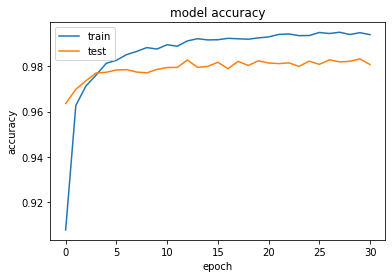

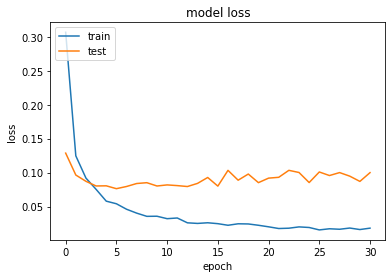

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [68]:
#evaluate the model
test_loss,test_acc = model_3.evaluate(X_test,Y_test)
print('Test accuracy',test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1018 - accuracy: 0.9705
Test accuracy 0.9704999923706055


In [69]:
model_4.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x0000017BF1430880>>

In [70]:
model_4.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[-0.05438082, -0.04026037, -0.0585398 , ...,  0.0390373 ,
         -0.02754928, -0.00783939],
        [-0.0619396 , -0.02741081, -0.05042906, ...,  0.01923648,
         -0.02536546,  0.00859162],
        [ 0.01365302,  0.05507299, -0.04245705, ...,  0.04719759,
         -0.0021395 ,  0.01432092],
        ...,
        [-0.03685945,  0.01624735, -0.04017387, ...,  0.02454862,
          0.02064979,  0.03272928],
        [ 0.00691476, -0.02842235,  0.0165991 , ...,  0.02671248,
         -0.0096762 , -0.03387665],
        [ 0.00419391, -0.03265075, -0.00024612, ..., -0.01208839,
          0.01708388,  0.03520948]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(512,) dtype=float32, numpy=
 array([-5.44614531e-02, -4.72593978e-02, -5.77335395e-02, -1.25689711e-02,
        -5.89047931e-02, -5.19375168e-02, -1.33133322e-01, -1.85257837e-01,
         1.20673301e-02,  8.90484750e-02,  3.74919139e-02, 

In [74]:
model_4.get_config()

{'name': 'sequential_6',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_layer_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'units': 512,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout_6',
    'trainable': True,
    'dtype': 'float32',
    'rate': 0.3,
    'noise_shape': None,
    'seed': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_layer_2',
    'trainable': True,


In [75]:
###improved Model 5: manupulating the batch size

In [76]:
#Most common type of model is a stack of layers
model_5 = tf.keras.Sequential()
N_hidden =512
#adda a densely-connected layer with 64 units to the model:
model_5.add(Dense(N_hidden, name='dense_layer', input_shape=(784,),activation ='relu'))
#Now the model will take as input arrays of shape(*,784)# and out put arrays of shape(*,64)
model_5.add(Dropout(0.3))
#Adding another dense layer:
model_5.add(Dense(N_hidden, name='dense_layer_2',activation ='relu'))
model_5.add(Dropout(0.3))
#After the first layer, you don't  need to specify the size of the input anymore:
#Add an output layer with 10 output units(10 different classes):
model_5.add(Dense(10, name ='dense_layer_3', activation ='softmax'))



In [77]:
#compiling the model
model_5.compile(optimizer ='Adam',
               loss ='categorical_crossentropy',
               metrics =['accuracy'])

In [78]:
#training the model.
training = model_5.fit(X_train, Y_train, batch_size=64, epochs =30, validation_split=0.2)

Epoch 1/30
750/750 [==============================] - 4s 5ms/step - loss: 0.2700 - accuracy: 0.9180 - val_loss: 0.1190 - val_accuracy: 0.9623
Epoch 2/30
750/750 [==============================] - 3s 4ms/step - loss: 0.1241 - accuracy: 0.9615 - val_loss: 0.0994 - val_accuracy: 0.9716
Epoch 3/30
750/750 [==============================] - 3s 4ms/step - loss: 0.0936 - accuracy: 0.9704 - val_loss: 0.0882 - val_accuracy: 0.9729
Epoch 4/30
750/750 [==============================] - 3s 5ms/step - loss: 0.0763 - accuracy: 0.9760 - val_loss: 0.0820 - val_accuracy: 0.9766
Epoch 5/30
750/750 [==============================] - 3s 4ms/step - loss: 0.0632 - accuracy: 0.9802 - val_loss: 0.0804 - val_accuracy: 0.9767
Epoch 6/30
750/750 [==============================] - 3s 4ms/step - loss: 0.0586 - accuracy: 0.9817 - val_loss: 0.0802 - val_accuracy: 0.9772
Epoch 7/30
750/750 [==============================] - 3s 4ms/step - loss: 0.0514 - accuracy: 0.9834 - val_loss: 0.0786 - val_accuracy: 0.9783
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


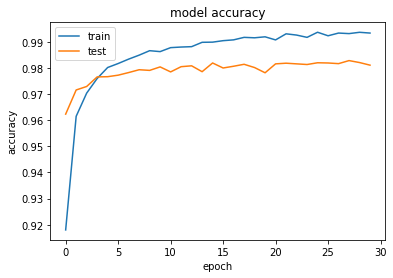

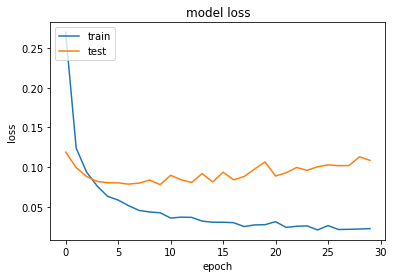

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [80]:
#evaluate the model

In [81]:
test_loss, test_acc = model_5.evaluate(X_test,Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0929 - accuracy: 0.9830
Test accuracy: 0.9829999804496765


In [82]:
model_5.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x0000017BF1217250>>

In [83]:
model_5.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[ 0.00342029,  0.03513525,  0.05086239, ..., -0.039343  ,
          0.05932941, -0.03559551],
        [-0.06172152,  0.05782805, -0.06363994, ..., -0.03992528,
          0.05850248,  0.00597071],
        [-0.04700031,  0.00329126,  0.00883825, ...,  0.02845346,
          0.00312109, -0.04803323],
        ...,
        [ 0.06585462, -0.01643992,  0.01930922, ..., -0.02451467,
          0.06228499, -0.05686292],
        [ 0.00882303,  0.02544525, -0.00645639, ...,  0.01037728,
         -0.0134321 ,  0.03986443],
        [ 0.0370691 , -0.03955225,  0.02935862, ...,  0.03751469,
          0.03919446, -0.01581596]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(512,) dtype=float32, numpy=
 array([-9.18527171e-02, -5.38563691e-02,  4.90818806e-02, -6.52523562e-02,
        -1.45030767e-01,  9.03757382e-03, -1.29431605e-01, -1.95840657e-01,
         6.96660951e-02, -1.98184520e-01,  9.61404853e-03, 

In [84]:
model_5.get_config()

{'name': 'sequential_7',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_layer_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'units': 512,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout_8',
    'trainable': True,
    'dtype': 'float32',
    'rate': 0.3,
    'noise_shape': None,
    'seed': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_layer_2',
    'trainable': True,


In [85]:
####improved Model 6 :Adding Another hidden layer to the Model

In [87]:
model_6 = tf.keras.Sequential()
N_hidden = 512

model_6.add(Dense(N_hidden, name ='dense_layer', input_shape=(784,), activation ='relu'))
model_6.add(Dropout(0.3))

model_6.add(Dense(N_hidden, name ='dense_layer_2', activation ='relu'))
model_6.add(Dropout(0.3))

model_6.add(Dense(N_hidden, name='dense_layer_3', activation ='relu'))
model_6.add(Dropout(0.3))

model_6.add(Dense(10, name ='dense_layer_4', activation='softmax'))


In [88]:
# Compiling the model.
model_6.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [89]:
# Training the model. 
training = model_6.fit(X_train, Y_train, batch_size=64, epochs=30, validation_split=0.2) 

Epoch 1/30
750/750 [==============================] - 5s 6ms/step - loss: 0.2952 - accuracy: 0.9088 - val_loss: 0.1234 - val_accuracy: 0.9611
Epoch 2/30
750/750 [==============================] - 4s 5ms/step - loss: 0.1384 - accuracy: 0.9590 - val_loss: 0.1068 - val_accuracy: 0.9687
Epoch 3/30
750/750 [==============================] - 4s 5ms/step - loss: 0.1134 - accuracy: 0.9654 - val_loss: 0.1132 - val_accuracy: 0.9673
Epoch 4/30
750/750 [==============================] - 4s 5ms/step - loss: 0.0871 - accuracy: 0.9732 - val_loss: 0.1027 - val_accuracy: 0.9714
Epoch 5/30
750/750 [==============================] - 4s 5ms/step - loss: 0.0852 - accuracy: 0.9745 - val_loss: 0.0915 - val_accuracy: 0.9747
Epoch 6/30
750/750 [==============================] - 4s 5ms/step - loss: 0.0698 - accuracy: 0.9780 - val_loss: 0.0937 - val_accuracy: 0.9755
Epoch 7/30
750/750 [==============================] - 4s 5ms/step - loss: 0.0670 - accuracy: 0.9793 - val_loss: 0.0904 - val_accuracy: 0.9751
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


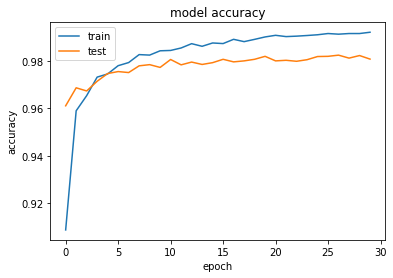

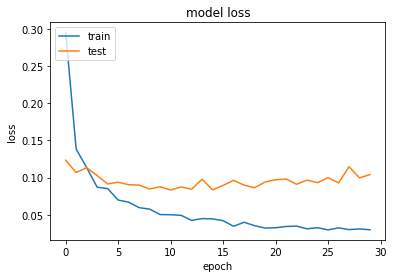

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [91]:
#evaluate the model
test_loss, test_acc = model_6.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0996 - accuracy: 0.9809
Test accuracy: 0.98089998960495


In [92]:
model_6.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 512)               401920    
                                                                 
 dropout_10 (Dropout)        (None, 512)               0         
                                                                 
 dense_layer_2 (Dense)       (None, 512)               262656    
                                                                 
 dropout_11 (Dropout)        (None, 512)               0         
                                                                 
 dense_layer_3 (Dense)       (None, 512)               262656    
                                                                 
 dropout_12 (Dropout)        (None, 512)               0         
                                                                 
 dense_layer_4 (Dense)       (None, 10)               

In [93]:
model_6.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x0000017BF0E3BCA0>>

In [94]:
model_6.weights

[<tf.Variable 'dense_layer/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[ 4.56925482e-02, -3.74864489e-02, -5.22511825e-02, ...,
          1.68382078e-02,  8.28148425e-03, -2.77101994e-03],
        [-2.36298032e-02, -2.68599615e-02,  6.31662011e-02, ...,
         -4.43079844e-02, -1.37340501e-02,  1.20617375e-02],
        [-4.83660996e-02, -5.31783700e-02,  6.67362064e-02, ...,
         -2.36416794e-02, -7.77909532e-03,  5.34646660e-02],
        ...,
        [ 5.82941622e-03,  2.23751366e-03, -2.51819231e-02, ...,
          3.35592479e-02, -2.86710039e-02, -4.04879972e-02],
        [-6.23991787e-02, -5.13493866e-02,  4.53504995e-02, ...,
          5.69630563e-02,  6.41592741e-02, -2.65985727e-06],
        [ 4.82527539e-02, -6.75670132e-02,  1.66271403e-02, ...,
          5.75086325e-02,  3.00089717e-02, -2.47142315e-02]], dtype=float32)>,
 <tf.Variable 'dense_layer/bias:0' shape=(512,) dtype=float32, numpy=
 array([-0.04550466,  0.03964159, -0.21263069, -0.09420895, -0.0708

In [95]:
model_6.get_config()

{'name': 'sequential_8',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_layer_input'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'units': 512,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout_10',
    'trainable': True,
    'dtype': 'float32',
    'rate': 0.3,
    'noise_shape': None,
    'seed': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_layer_2',
    'trainable': True,